## 6. pn Junction Diode: I-V characteristics
### 6.1 The ideal diode equation
### 6.1.1 Qualitative derivation
### 6.1.2 Quantitative solution strategy
General considerations
$$I=AJ\quad (A=cross-section\ area)$$
$$J=J_n(x)+J_p(x)$$
$$J_n=q\mu_n n\varepsilon + qD_n\frac{dn}{dx}$$
$$J_p=q\mu_p p\varepsilon - qD_p\frac{dp}{dx}$$
Quasineutral Region Considerations, $G_L=0$\
the minority carrier diffusion equations appropriate for the p and n quasineutral regions
$$0=D_n\frac{d^2\Delta n_p}{dx^2}-\frac{\Delta n_p}{\tau_n}\quad x\le -x_p$$
$$0=D_p\frac{d^2\Delta p_n}{dx^2}-\frac{\Delta p_n}{\tau_p}\quad x\ge x_n$$
since $\varepsilon \cong 0$ and $dn_0/dx=dp_0/dx=0$, the carrier current densities in the quasineutral regions simplify to
$$J_n=qD_n\frac{d\Delta n_p}{dx}\quad x\le -x_p $$
$$J_p=-qD_p\frac{d\Delta p_n}{dx}\quad x\ge x_n$$
Depletion Region Considerations
Boundary Conditions_At ohmic contacts, At the depletion region edges
### 6.1.3 Derivation Proper
### 6.1.4 Examination of Results
Ideal I-V\
$$ln(I)=ln(I_0)+\frac{q}{kT}V_A \quad if\ V_A > few\ \frac{kT}{q}$$
Saturation Current\
p+n diodes
$$I_0=qA\frac{D_p}{L_p}\frac{n_i^2}{N_D}$$
n+p diodes
$$I_0=qA\frac{D_n}{L_n}\frac{n_i^2}{N_A}$$

In [1]:
# Exercise 6.1

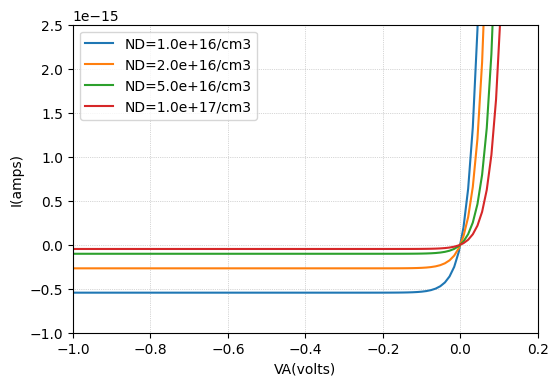

In [33]:
# Exercise 6.2
# ideal silicon p+n step junction at 300K, A=1e-4cm2, taup=1e-6sec, I0 is reverse bias saturation current
# the mobility calculation assums the hole minority carrier in n-type ND, mobility is equal to the hole majority carrier mobility
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
A=100*1e-4*100*1e-4
ND=[1e16, 2e16, 5e16, 1e17]
taup=1e-6
VA=np.linspace(-1,0.2,101)

plt.figure(figsize=(6,4))
for ii in ND:
    Dp=k*T*mup(T,ii) 
    Lp=np.sqrt(Dp*taup)
    I0=q*A*(Dp/Lp)*(ni(T)**2/ii)
    I=I0*(np.exp(VA/(k*T))-1)
    plt.plot(VA,I,label=f'ND={ii:.1e}/cm3')
    
plt.xlim(-1,0.2), plt.ylim(-10e-16, 25e-16)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

Carrier Currents\
Carrier Concentrations\
### Exercise 6.3
$$\Delta P_n(x')=\Delta P_n(x'=0)e^{-x'/L_p}$$
in the near vicinity of the delpletion region edge $\Delta P_n=P_n$
$$P_n(x')=P_n(0)e^{-x'/L_p}$$
$$ln\left[\frac{P_n(x')}{P_n(0)}\right]=-\frac{x'}{L_p}$$
$$L_p=\frac{x'}{ln\left[\frac{P_n(0)}{P_n(x')}\right]}$$

In [52]:
# Exercise 6.3
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

nnAtxn=1e15
pnAtxn=1e10
nnAtinf=1e15
pnAtinf=1e5

VA=k*T*np.log(nnAtxn*pnAtxn/(nnAtinf*pnAtinf))
print(f'VA={VA:.2f}V')
xprime=160e-4 #160um
pnAtxprime=1e8
Lp=xprime/np.log(pnAtxn/pnAtxprime)
print(f'Lp={Lp:.2e}cm') #34.7um

VA=0.30V
Lp=3.47e-03cm


## 6.2 Deviations from the ideal
### 6.2.1 Ideal Theory versus Experiment
### 6.2.2 Reverse-Bias Breakdown
### - Avanlanche
   $$M=\frac{|I|}{I_0},\quad |I|=MI_0,\quad I_0=exp(qV_A/kT)-1$$
   $$M=\frac{1}{1-\left[\frac{|VA|}{VBR}\right]^m}$$

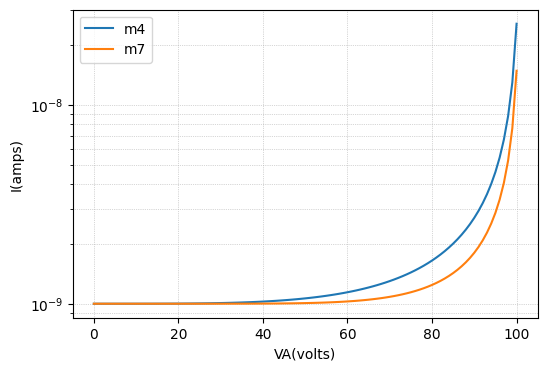

In [69]:
# Exercise 6.5
# multiplication facotr M plot versus VA/VBR when m=3, m=6
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
I0=1e-9
VBR=101
VA=np.linspace(0,100,101)
M4=1/(1-(VA/VBR)**4)
M7=1/(1-(VA/VBR)**7)
I4=M3*I0
I7=M6*I0
plt.figure(figsize=(6,4))
plt.semilogy(VA,I4,label="m4")
plt.semilogy(VA,I7,label="m7")
#plt.xlim(-1,0), plt.ylim(-10,0)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### - Zener Diode
### 6.2.3 The R-G current
$$I=I_{DIFF}+I_{R-G}=I_{01}e^{qV_A/kT}+I_{02}e^{qV_A/2kT}$$

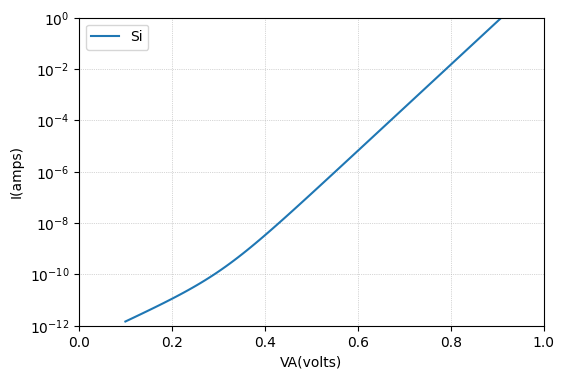

In [66]:
# Exercise 6.6, I01=diff, I02=r-g
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
A=100*1e-4*100*1e-4
ND=1e16 #cm-3
taun=1e-6 #second
taup=1e-6 #second

#Diff current
Dp=k*T*mup(T,ND)
Lp=np.sqrt(Dp*taup)
I01=q*A*Dp/Lp*ni(T)**2/ND
#R-G current
Vbi=Eg(T)/2+k*T*np.log(ND/ni(T))
W=np.sqrt(2*e_si*e0/(q*ND)*Vbi)
I02=q*A*ni(T)/np.sqrt(taun*taup)*W*(k*T)/(3*Vbi/4)

VA=np.linspace(0.1,1,101)
Isi=I01*np.exp(VA/(k*T))+I02*np.exp(VA/(2*k*T))

plt.figure(figsize=(6,4))
plt.semilogy(VA,Isi,label="Si")
plt.xlim(0,1), plt.ylim(1e-12,1)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### 6.2.4 VA -> Vbi High current phenomena
### - Series Resistance
$$V_J=V_A-IR_s$$
$$I=I_0e^{qV_J/kT}=I_0e^{q(V_A-IR_s)/kT}\quad V_A \rightarrow V_{bi}$$

## 6.3 Special consideration
### 6.3.1 charge control approach
### 6.3.2 Narrow-Base Diode
### - current derivation
### - Limiting cases/Punch-Through

In [19]:
# Problem 6.6, n+p step junction(NA=1e15,taun=1e-6,A=1e-3cm2)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=500
A=1e-3
NA=1e15 #cm-3
taun=1e-6 #second
Dn=k*T*mun(T)
Ln=np.sqrt(Dn*taun)
I0=q*A*Dn/Ln*ni(T)**2/NA
'''
VA=[-50, -0.1, 0.1, 0.5]
for V in VA:
    I = I0 * (np.exp(V / (k * T / q)) - 1)
    print(f"VA = {V:.2f} V, I = {I:.6e} A")
'''
VA = np.array([-50, -0.1, 0.1, 0.5])
I=I0*(np.exp(VA/(k*T))-1)
print("VA(V):",VA, "I(A):",I)

VA(V): [-50.   -0.1   0.1   0.5] I(A): [-5.18978601e-05 -4.68027353e-05  4.76722725e-04  5.69008283e+00]


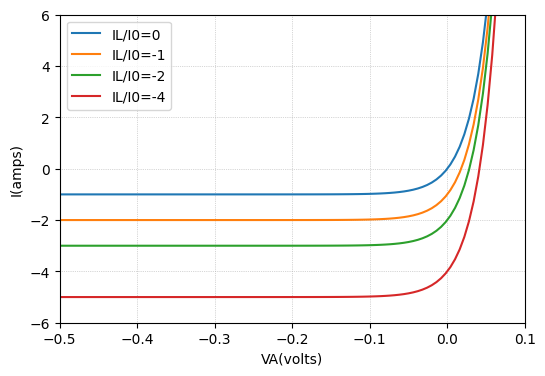

In [25]:
# Problem 6.7, I-V solar cell
# I=I0(exp(qVA/kT)-1)+IL, T=300, I/I0 vs VA fpr assumed values of IL/I0= 1,-1,-2,-4, VA -0.5 ~ 0.1V
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
VA=np.linspace(-0.5, 0.1, 101)
I1=np.exp(VA/(k*T))-1 #I/I0 with IL/I0=0
# I/I0=exp(qVA/kT)-1 + IL/I0 = I1-(IL/I0=1,-1,-2,-4)
I2=I1-1
I3=I1-2
I4=I1-4

'''
plt.figure(figsize=(6, 4))
for IL in [0, -1, -2, -4]:
    plt.plot(VA, I1 + IL, label=f"IL/I0={IL}")
'''

plt.figure(figsize=(6,4))
plt.plot(VA,I1,label="IL/I0=0")
plt.plot(VA,I2,label="IL/I0=-1")
plt.plot(VA,I3,label="IL/I0=-2")
plt.plot(VA,I4,label="IL/I0=-4")
plt.xlim(-0.5,0.1), plt.ylim(-6,6)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

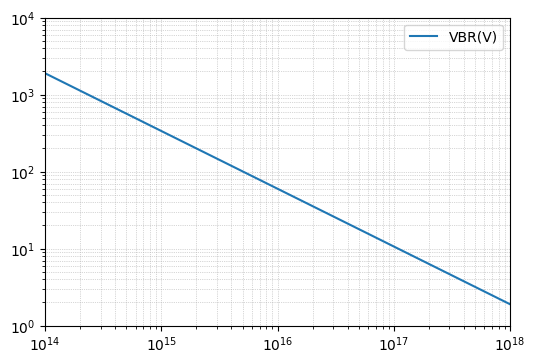

In [1]:
# Problem 6.14, carrier multiplication and avalanche breakdown
# Figure 6.11, page 263, VBR vs NA or ND, VBR ~ 60(NB/1e16)^-0.75
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

NB=np.logspace(14,18,101)
VBR=60*(NB/1e16)**-0.75

plt.figure(figsize=(6,4))
plt.loglog(NB,VBR,label="VBR(V)")
plt.xlim(1e14,1e18), plt.ylim(1,10000)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

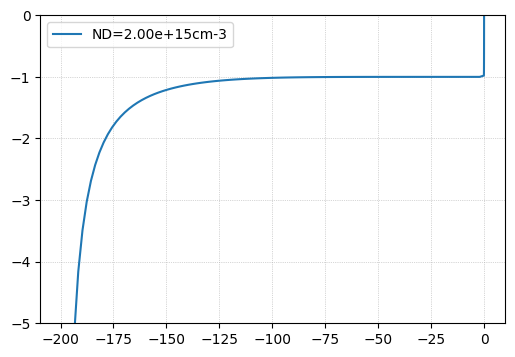

In [2]:
# Probelm 6.14
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
ND=2e15
m=6
VBR=60*(ND/1e16)**(-3/4)
VA1=np.linspace(-VBR+1,-0.1,101)
VA2=np.linspace(-0.1,0,11)
VA=np.concatenate([VA1,VA2])
M=(1-np.abs(VA/VBR)**m)**(-1)

Iratio=M*(np.exp(VA/(k*T))-1)

plt.figure(figsize=(6,4))
plt.plot(VA,Iratio,label=f"ND={ND:.2e}cm-3")
#plt.xlim(-35,0), 
plt.ylim(-5,0)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

$$\frac{I_{R-G}(V_A)}{|I_{R-G}(-V_{BR}/2)|}=-M\frac{W(V_A)}{W(-V_{BR}/2)}=-M\sqrt{\frac{V_{bi}-V_A}{V_{bi}+V_{BR}/2}}$$
$$V_{bi}=E_G/2q+(kT/q)ln(N_D/n_i)$$

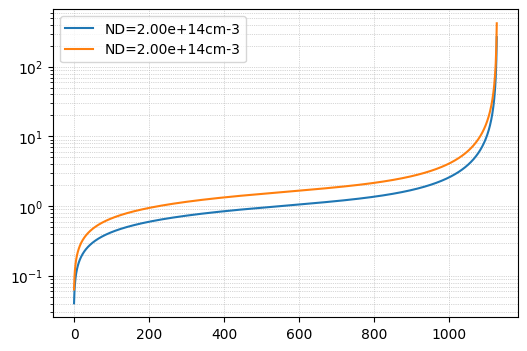

In [12]:
# Problem 6.15 I0 by the reverse bias I_R-G. Normalize the current axis to the magnitude of the current at VA=-VBR/2
# ND=2e16
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
ND=2e14
m=6

VBR=60*(ND/1e16)**(-3/4)
VA=np.linspace(-VBR+1,-0.1,2000)
M=(1-np.abs(VA/VBR)**m)**(-1)

Vbi=Eg(T)/2+k*T*np.log(ND/ni(T))
Wratio1=np.sqrt((Vbi-VA)/(Vbi+VBR/2))
Wratio2=np.sqrt((Vbi-VA)/(Vbi+VBR/5))
Iratio1=-M*Wratio1
Iratio2=-M*Wratio2

plt.figure(figsize=(6,4))
plt.semilogy(-VA,-Iratio1,label=f"ND={ND:.2e}cm-3")
plt.semilogy(-VA,-Iratio2,label=f"ND={ND:.2e}cm-3")
#plt.xlim(-35,0), 
#plt.ylim(0,10)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

Problem 6.21 Diode I-V characteristics
$$I_J=I_{DIFF}+I_{R-G}=I_{01}(e^{qV_J/n_1kT}-1)+I_{02}(e^{qV_J/n_2kT}-1)$$
I_01, I_02=constant, n1=1, n2=2
$$I_J=I_{DIFF}+I_{R-G}+I_{Shunt Resistor}=I_{01}(e^{qV_J/n_1kT}-1)+I_{02}(e^{qV_J/n_2kT}-1) + \frac{V_J}{R_{SH}}$$
$$with\ V_A=V_J+IR_s$$
VA-Rs-Diode-Ground, Diode=R_shunt parallel


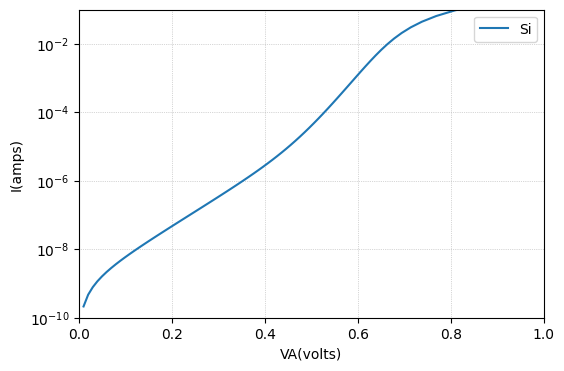

In [87]:
# Problem 6.21 Diode I-V characteristics
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

I01=1e-13; I02=1e-9; n1=1; n2=2; RS=1; RSH=1e12

VJ=np.linspace(0.01,1,101)

I=I01*(np.exp(VJ/(n1*k*T))-1)+I02*(np.exp(VJ/(n2*k*T))-1)+VJ/RSH
VA=VJ+I*RS

plt.figure(figsize=(6,4))
plt.semilogy(VA,I,label="Si")
plt.xlim(0,1), plt.ylim(1e-10,1e-1)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

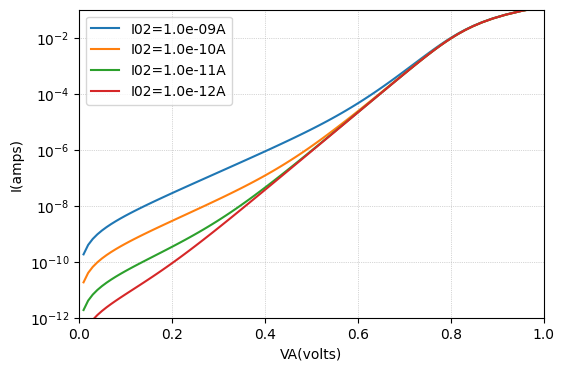

In [8]:
# Problem 6.21 Diode I-V characteristics
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

#page 262, figure 6.10 (a) plot, n1=1.21, n2=2.3, RSH=1e12, I01=1e-13, I02=1e-12

I01=1e-13; I02=1e-9; n1=1.21; n2=2.3; RS=1; RSH=1e12

#RSH=[1e12, 1e6, 1e3]
#RS=[1, 10, 100, 1000]
I02=[1e-9, 1e-10, 1e-11, 1e-12]
#I01=[1e-13, 1e-12, 1e-11, 1e-10]
VJ=np.linspace(0.01,1,101)

plt.figure(figsize=(6,4))
#for ii in RSH:
#for ii in RS:
#for ii in I02:
for ii in I02:
    I=I01*(np.exp(VJ/(n1*k*T))-1)+ii*(np.exp(VJ/(n2*k*T))-1)+VJ/RSH
    VA=VJ+I*RS
    #plt.semilogy(VA,I,label=f'RSH={ii:.1e}ohm')
    #plt.semilogy(VA,I,label=f'RS={ii:.1e}ohm')
    plt.semilogy(VA,I,label=f'I02={ii:.1e}A')

plt.xlim(0,1), plt.ylim(1e-12,1e-1)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

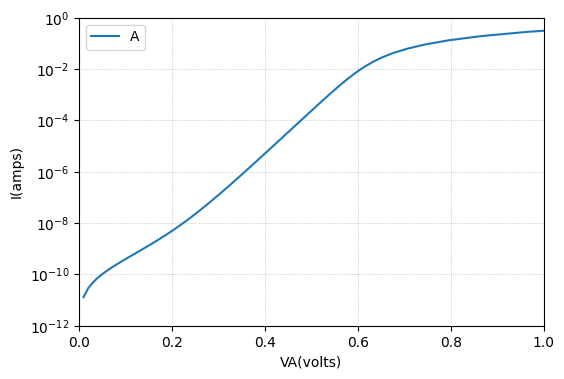

In [11]:
# Problem 6.21 Diode I-V characteristics
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
A=1e-2 #cm2, 100ux100u
n1=1; n2=2; RS=1; RSH=1e12
tau=1e-6
NA=1e15

VJ=np.linspace(0.01,1,101)
Vbi=Eg(T)/2+k*T*np.log(NA/ni(T))
VA0=Vbi/4
W0=np.sqrt(2*e_si*e0/(q*NA)*(Vbi-VA0))

I01=q*A*(ni(T)**2/NA)*np.sqrt(k*T*mun(T,NA)/tau)
I02=(q*A*ni(T)*W0/tau)*(k*T/(Vbi-VA0))

I=I01*(np.exp(VJ/(n1*k*T))-1)+I02*(np.exp(VJ/(n2*k*T))-1)+VJ/RSH
VA=VJ+I*RS

plt.figure(figsize=(6,4))
plt.semilogy(VA,I,label='A')
plt.xlim(0,1), plt.ylim(1e-12,1)
plt.xlabel("VA(volts)"), plt.ylabel("I(amps)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()